<a href="https://colab.research.google.com/github/IvanLin00/Titanic_Survival_Analysis/blob/main/Titanic_Survival_Analysis_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project #2: Titanic - Who will survive?

In this project, we will be looking at what factors improve a passengers' chances of survival if they were on the Titanic. Was it pure luck or where the passengers' backgrounds a factor in if they survived or not?

The first step is to get the data set. I imported it as well as the packages used in this project below.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")
data = pd.read_csv("train.csv")

Part 1: EDA

I will first choose which which columns of the data that I think will be relevant for the models that I want to generate later. The columns that I chose are ticket class ("Pclass"), passenger name ("Name"), sex, age, number of siblings or spouses ("SibSp"), number of parents or children ("Parch"), cost of ticket ("Fare"), port of embarkation ("Embarked"), and if they survived or not ("Survived").

Next, I cleaned the data. I decided to drop the rows that did not have an age value and the rows that did not have a port of embarkation because I think that those two may be big factors into determining if a passenger survives or not. I also checked for outliers in the price of tickets within ticket class. When I found those outliers, I adjusted the values so that all values above the upper bound rounded down to that upper bound and all values below the lower bound rounded up to that lower bound. I did this so that the price of the ticket did not impact the prediction as much as it would have if they had their original values, but the impact will still be seen if their values are high or low.


In [ ]:
data_analysis = data[["Pclass", "Name", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked", "Survived"]]


## Drop the rows that do not have an age and rows that do not have
data_analysis = data_analysis.dropna(subset = ["Age"], how = "any")
data_analysis = data_analysis.dropna(subset = ["Embarked"], how = "any")
data_analysis["Fare"] = data_analysis["Fare"].round(2)
group_by_ticket = data_analysis.groupby("Pclass")

## Using Tukey's Rule to find the outliers and replace the outliers with their respective bound

q1 = group_by_ticket["Fare"].transform(lambda x: np.percentile(x, 25))
q3 = group_by_ticket["Fare"].transform(lambda x: np.percentile(x, 75))
iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
data_analysis.loc[data_analysis["Fare"] < lower_bound, "Fare"] = lower_bound
data_analysis.loc[data_analysis["Fare"] > upper_bound, "Fare"] = upper_bound

I will first explore the socioeconomic status of the passengers onboard the Titanic and see if there is any relationship between socioeconomic status and any of the other variables. I will be analyzing socioeconomic status based on the passenger's ticket prices. First, I looked at the relationship between age and ticket prices. In the scatterplot generated below, there does not seem to be a strong relationship between age and ticket prices. This point is further strengthen because the correlation coefficient of the relationship of those two is 0.116, which indicates a weak positive relationship.

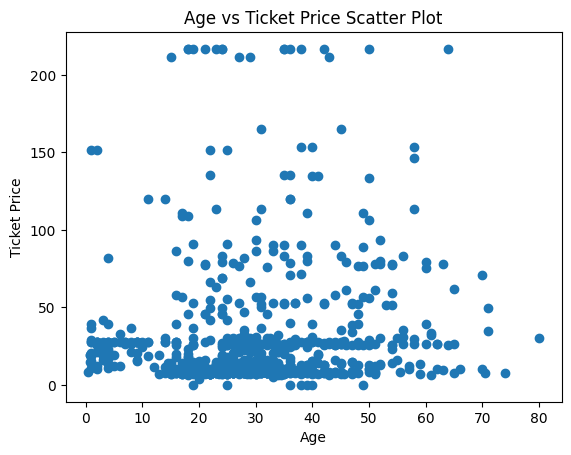

0.11593202974119401


In [ ]:
plt.scatter(data_analysis['Age'], data_analysis['Fare'])

plt.xlabel('Age')
plt.ylabel('Ticket Price')
plt.title('Age vs Ticket Price Scatter Plot')
plt.show()

price_age_correlation = data_analysis['Age'].corr(data_analysis['Fare'])
print(price_age_correlation)

Next, I analyzed the relationship between number of family members and ticket prices. To calculate the number of family members, I added the "SibSp" column and the "Parch" column together. Similar to the scatterplot generated for age, there does not seem to be a strong relationship between ticket prices and number of family members present. The correlation coefficient is 0.221, indicating a weak positive relationship.

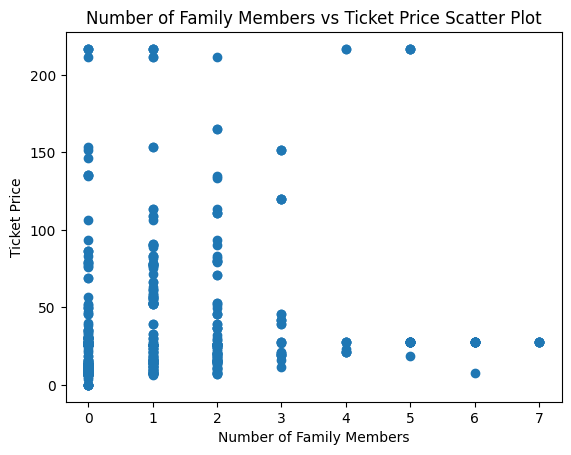

0.22107894882081489


In [ ]:
data_analysis['NumFamily'] = data_analysis['SibSp'] + data_analysis['Parch']
plt.scatter(data_analysis['NumFamily'], data_analysis['Fare'])

# add labels and title
plt.xlabel('Number of Family Members')
plt.ylabel('Ticket Price')
plt.title('Number of Family Members vs Ticket Price Scatter Plot')
plt.show()

price_family_correlation = data_analysis['NumFamily'].corr(data_analysis['Fare'])
print(price_family_correlation)

I analyzed how the gender ratios looked like within ticket classes. To do this, I generated a pie chart splitting the data into subsets of gender and ticket classes. I found that there are typically more males than females in each of the ticket classes. The numbers were close to each other for first class and second class, but third class had significantly more male passengers than female passengers.

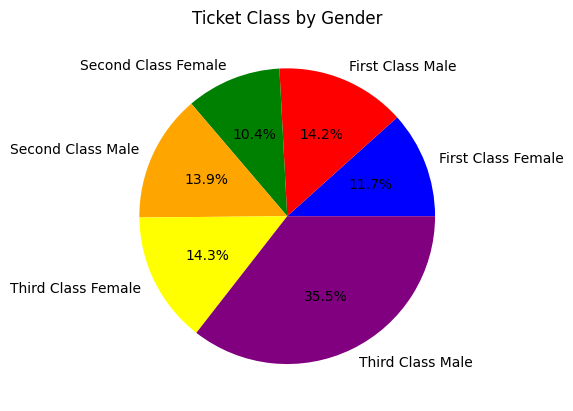

In [ ]:
gender_class = data_analysis.groupby(['Pclass', 'Sex']).size().reset_index(name='counts')

labels = ['First Class Female', 'First Class Male', 'Second Class Female', 'Second Class Male',  'Third Class Female', 'Third Class Male']
sizes = gender_class['counts'].tolist()
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ticket Class by Gender')
plt.show()

I also analyzed how the frequency of depature sites looked like within ticket classes. To do this, I generated a pie chart splitting the data into subsets of ports of embarkation and ticket classes. I found that the majority of paasengers came from Southampton and that Southampton Third Class had the modt people. There was a very small portion of people who left from Queenstown. In addition, the majority of people who left from Cherbourg were first class.

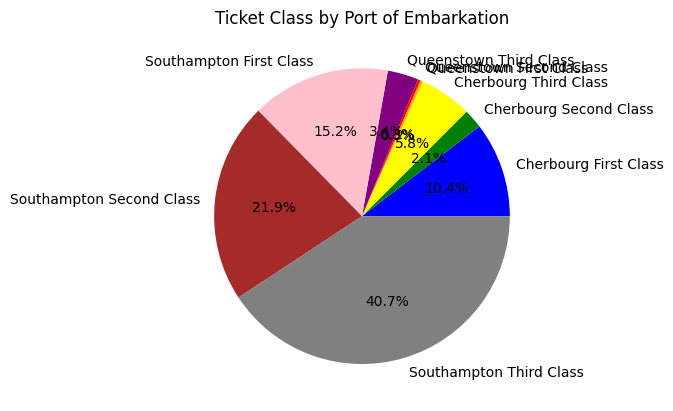

In [ ]:
departure_class = data_analysis.groupby(['Embarked', 'Pclass']).size().reset_index(name='counts')

labels = ['Cherbourg First Class', 'Cherbourg Second Class', 'Cherbourg Third Class', 'Queenstown First Class', 'Queenstown Second Class', 'Queenstown Third Class', 'Southampton First Class', 'Southampton Second Class', 'Southampton Third Class']
sizes = departure_class['counts'].tolist()
colors = ['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink', 'brown', 'gray']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Ticket Class by Port of Embarkation')
plt.show()

I also looked at the survival rates based on different factors in the data. First, I generated a pie chart of the percentage of people survived based on the sex of the passengers of the Titanic. In the figure below, it shows that there were more males than females on this voyage. It also shows that a majority of the males did not survive the Titanic. In fact, even though there were less women, more women survived the Titanic than men.

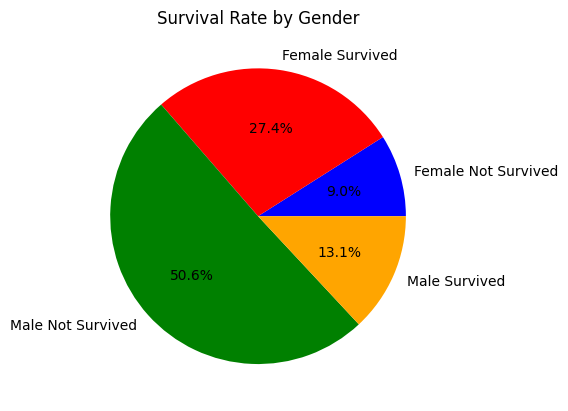

In [ ]:
survived_sex = data_analysis.groupby(['Sex', 'Survived']).size().reset_index(name='counts')

labels = ['Female Not Survived', 'Female Survived', 'Male Not Survived', 'Male Survived']
sizes = survived_sex['counts'].tolist()
colors = ['blue', 'red', 'green', 'orange']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Survival Rate by Gender')
plt.show()

Next, I generated a pie chart of the percentage of people survived based on their ticket class. In the figure below, it shows that the majority of passengers on the Titanic were from third class. However, the portion of passengers that survived that was the highest was in first class.

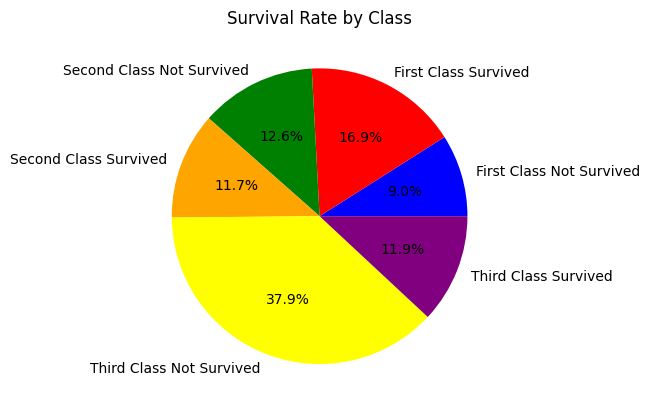

In [ ]:
survived_class = data_analysis.groupby(['Pclass', 'Survived']).size().reset_index(name='counts')

labels = ['First Class Not Survived', 'First Class Survived', 'Second Class Not Survived', 'Second Class Survived',  'Third Class Not Survived', 'Third Class Survived']
sizes = survived_class['counts'].tolist()
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Survival Rate by Class')
plt.show()

I also analyzed the ages of the passengers that survived the Titanic and did not survive the Titanic. I generated a bar graph displaying the number of passengers within the specific age ranges. When looking at the two bar graphs together, there does not seem to be a clear distinction in which ages were more likely to survive. One distinction is that more passengers between the ages of 0 and 10 survived in comparison to the number of passengers between the ages of 0 and 10 that did not survive.

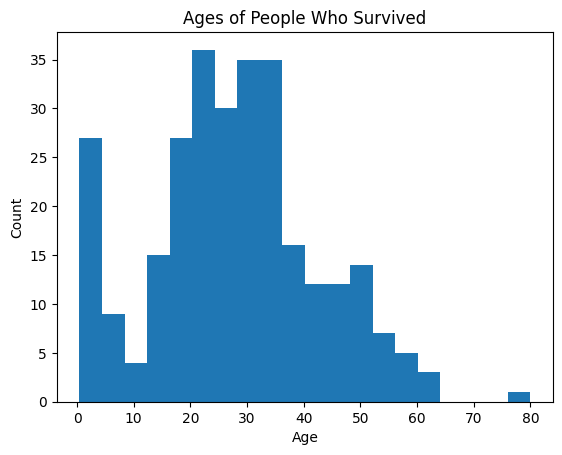

In [ ]:
survived_data = data_analysis[data_analysis['Survived'] == 1]

plt.hist(survived_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of People Who Survived')
plt.show()

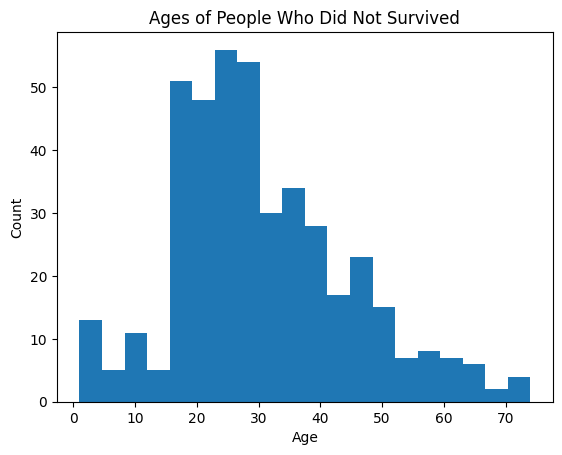

In [ ]:
not_survived_data = data_analysis[data_analysis['Survived'] == 0]

plt.hist(not_survived_data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Ages of People Who Did Not Survived')
plt.show()

I generated a pie chart of the percentage of people survived based on their port of embarkation. In the figure below, it does not show a clear distinction in whether this affects a passenger's survival chances. Looking at the percentages specific to each port, the not survived rate is roughly double of the survived rate.

  Embarked  Survived  counts
0        C         0      51
1        C         1      79
2        Q         0      20
3        Q         1       8
4        S         0     353
5        S         1     201


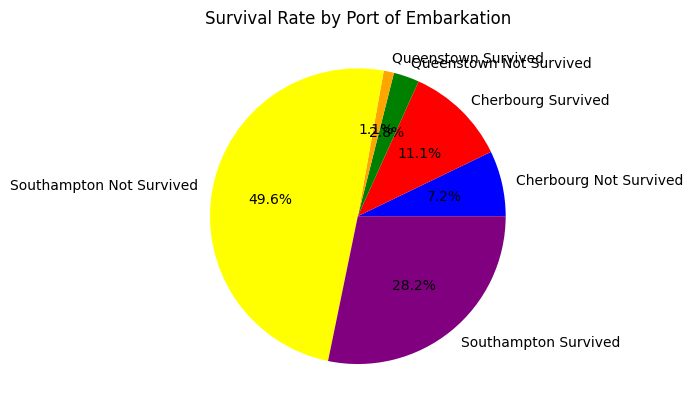

In [ ]:
survived_embarked = data_analysis.groupby(['Embarked', 'Survived']).size().reset_index(name='counts')
print(survived_embarked)

labels = ['Cherbourg Not Survived', 'Cherbourg Survived', 'Queenstown Not Survived', 'Queenstown Survived',  'Southampton Not Survived', 'Southampton Survived']
sizes = survived_embarked['counts'].tolist()
colors = ['blue', 'red', 'green', 'orange', 'yellow', 'purple']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Survival Rate by Port of Embarkation')
plt.show()

Based on the charts generated, I believe the most important features to determine a person's survival on the Titanic are gender and class. Age and port of embarkation does not seem to have to strong of an impact on a passenger's survival.

Next, I will extract information from the non-numerical features. The non-numerical features in the data that I will be using in my analysis are sex and port of embarkation. I will convert sex to 0 and 1, 0 indicating male and 1 indicating female. In addition, I will be converting the ports to 0, 1, and 2, 0 indicating Cherbourg, 1 indicating Queenstown, and 2 indicating Southampton.

In [ ]:
gender_mapping = {'male': 0, 'female': 1}
embark_mapping = {'C': 0, 'Q': 1, 'S': 2}

data_analysis['Sex'] = data_analysis['Sex'].map(gender_mapping)
data_analysis['Embarked'] = data_analysis['Embarked'].map(embark_mapping)

Part 2: Modelling and Question Answering


In this part, I will generate three models using the training data available. I split the entire set in a 4:1 ratio, where 80% of the data will be used for training and the remaining 20% of the data will be used for testing.

In [ ]:
n = int(len(data_analysis) * 0.8)
training_data = data_analysis[:n]
testing_data = data_analysis[n:]
training_labels = training_data['Survived'].tolist()
actual_labels = testing_data['Survived'].tolist()
testing_data = testing_data.drop(['Name', 'Survived', 'NumFamily'], axis = 1)
training_data = training_data.drop(['Name', 'Survived', 'NumFamily'], axis = 1)

The three models I will be implementing are logistic regression, Naive Bayes, and decision trees. I chose these three because this task is a binary classification task and these models are used for that. I implemented a logistic regression model below. The logistic regression model has acurracy of 0.8181818181818182, precision of 0.7678571428571429, recall of 0.7678571428571429, and f1-score of 0.7678571428571429.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

logistic_regression = LogisticRegression()
logistic_regression.fit(training_data, training_labels)
predicted_labels = logistic_regression.predict(testing_data)

print("Accuracy:", accuracy_score(actual_labels, predicted_labels))
print("Precision:", precision_score(actual_labels, predicted_labels))
print("Recall:", recall_score(actual_labels, predicted_labels))
print("F1-score:", f1_score(actual_labels, predicted_labels))

Accuracy: 0.8181818181818182
Precision: 0.7678571428571429
Recall: 0.7678571428571429
F1-score: 0.7678571428571429


Next, I implement a Gaussian Naive Bayes model below. The Gaussian Naive Bayes model has accuracy of 0.8251748251748252, precision of 0.7924528301886793, recall of 0.75, and f1-score of 0.7706422018348623.

In [ ]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(training_data, training_labels)
predicted_labels = naive_bayes.predict(testing_data)

print("Accuracy:", accuracy_score(actual_labels, predicted_labels))
print("Precision:", precision_score(actual_labels, predicted_labels))
print("Recall:", recall_score(actual_labels, predicted_labels))
print("F1-score:", f1_score(actual_labels, predicted_labels))

Accuracy: 0.8251748251748252
Precision: 0.7924528301886793
Recall: 0.75
F1-score: 0.7706422018348623


Finally, I implemented a decision tree classifier below. The Decision Tree Classifier has accuracy of 0.8111888111888111, precision of 0.7377049180327869, recall of 0.8035714285714286, and f1-score of 0.7692307692307693.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(training_data, training_labels)
predicted_labels = decision_tree.predict(testing_data)

print("Accuracy:", accuracy_score(actual_labels, predicted_labels))
print("Precision:", precision_score(actual_labels, predicted_labels))
print("Recall:", recall_score(actual_labels, predicted_labels))
print("F1-score:", f1_score(actual_labels, predicted_labels))


Accuracy: 0.7902097902097902
Precision: 0.7096774193548387
Recall: 0.7857142857142857
F1-score: 0.7457627118644068


 From the evaluation metrics generated, all models had a similar performance. The Naive Bayes slightly edges the rest out. I based this decision by looking at the f1-score, as that is the best metric in telling which model performed the best by balancing the precision and recall values.

Below, I will implement the models with a cross validation set to see if this will improve the model's performance. I will be splitting the original data in a 6 by 2 by 2 ratio. 60% of the data will be used for training, 20% of the data will be used for validation, and the remaining will be used for testing.

In [ ]:
train = int(len(data_analysis) * 0.6)
validation = int(len(data_analysis) * 0.8)
new_training_data = data_analysis[:train]
validation_data = data_analysis[train:validation]
new_testing_data = data_analysis[validation:]
new_training_labels = new_training_data['Survived'].tolist()
validation_labels = validation_data['Survived'].tolist()
new_actual_labels = new_testing_data['Survived'].tolist()
new_testing_data = new_testing_data.drop(['Name', 'Survived', 'NumFamily'], axis = 1)
validation_data = validation_data.drop(['Name', 'Survived', 'NumFamily'], axis = 1)
new_training_data = new_training_data.drop(['Name', 'Survived', 'NumFamily'], axis = 1)

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

logistic_regression = LogisticRegression()

# define the number of folds for cross-validation
kfold = KFold(n_splits=5)
best_validation_f1 = 0
best_model = logistic_regression

# train the model on the training set using cross-validation
for train_index, test_index in kfold.split(new_training_data):
    train_data = new_training_data[train_index[0]:train_index[-1]]
    train_labels = new_training_labels[train_index[0]:train_index[-1]]
    logistic_regression.fit(train_data, train_labels)

    validation_predicted_labels = logistic_regression.predict(validation_data)
    validation_f1 = f1_score(validation_labels, validation_predicted_labels)
    if validation_f1 > best_validation_f1:
        best_validation_f1 = validation_f1
        best_model = logistic_regression

# evaluate the final model on the testing set
predicted_labels = best_model.predict(new_testing_data)
test_acc = f1_score(predicted_labels, new_actual_labels)

print("Accuracy:", accuracy_score(new_actual_labels, predicted_labels))
print("Precision:", precision_score(new_actual_labels, predicted_labels))
print("Recall:", recall_score(new_actual_labels, predicted_labels))
print("F1-score:", f1_score(new_actual_labels, predicted_labels))


Accuracy: 0.8181818181818182
Precision: 0.7884615384615384
Recall: 0.7321428571428571
F1-score: 0.7592592592592592


Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

naive_bayes = GaussianNB()

# define the number of folds for cross-validation
kfold = KFold(n_splits=5)
best_validation_f1 = 0
best_model = naive_bayes

# train the model on the training set using cross-validation
for train_index, test_index in kfold.split(new_training_data):
    train_data = new_training_data[train_index[0]:train_index[-1]]
    train_labels = new_training_labels[train_index[0]:train_index[-1]]
    naive_bayes.fit(train_data, train_labels)

    validation_predicted_labels = naive_bayes.predict(validation_data)
    validation_f1 = f1_score(validation_labels, validation_predicted_labels)
    if validation_f1 > best_validation_f1:
        best_validation_f1 = validation_f1
        best_model = naive_bayes

# evaluate the final model on the testing set
predicted_labels = best_model.predict(new_testing_data)
test_acc = f1_score(predicted_labels, new_actual_labels)

print("Accuracy:", accuracy_score(new_actual_labels, predicted_labels))
print("Precision:", precision_score(new_actual_labels, predicted_labels))
print("Recall:", recall_score(new_actual_labels, predicted_labels))
print("F1-score:", f1_score(new_actual_labels, predicted_labels))


Accuracy: 0.8111888111888111
Precision: 0.7735849056603774
Recall: 0.7321428571428571
F1-score: 0.7522935779816513


Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

decision_tree = DecisionTreeClassifier()

# define the number of folds for cross-validation
kfold = KFold(n_splits=5)
best_validation_f1 = 0
best_model = decision_tree

# train the model on the training set using cross-validation
for train_index, test_index in kfold.split(new_training_data):
    train_data = new_training_data[train_index[0]:train_index[-1]]
    train_labels = new_training_labels[train_index[0]:train_index[-1]]
    decision_tree.fit(train_data, train_labels)

    validation_predicted_labels = decision_tree.predict(validation_data)
    validation_f1 = f1_score(validation_labels, validation_predicted_labels)
    if validation_f1 > best_validation_f1:
        best_validation_f1 = validation_f1
        best_model = decision_tree

# evaluate the final model on the testing set
predicted_labels = best_model.predict(new_testing_data)
test_acc = f1_score(predicted_labels, new_actual_labels)

print("Accuracy:", accuracy_score(new_actual_labels, predicted_labels))
print("Precision:", precision_score(new_actual_labels, predicted_labels))
print("Recall:", recall_score(new_actual_labels, predicted_labels))
print("F1-score:", f1_score(new_actual_labels, predicted_labels))


Accuracy: 0.7762237762237763
Precision: 0.7
Recall: 0.75
F1-score: 0.7241379310344827


From these cross validation models, the performance did not improve. The f1-scores of each of the models decreasesd.